In [74]:
import kinetics
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'
print(kinetics.__version__)

1.4.3


In [83]:
ired = kinetics.Tri_Tri_seq_eq(kcat='ired_kcat',
                              kma='ired_km_nadph', kmb='ired_km_aldehyde', kmc='ired_km_nh2',
                              kmp='ired_km_nadp', kmq='ired_km_amine', kmr='ired_km_h2o',
                              keq='ired_keq',
                              a='nadph', b='aldehyde', c='nh2', p='nadp', q='amine', r='h2o', enz='ired',
                              substrates=['nadph', 'aldehyde', 'nh2'], products=['nadp', 'amine'])

ired.parameter_distributions = {'ired_km_nadph': (20, 100),
                                'ired_km_aldehyde': (500, 5000),
                                'ired_km_nh2': (500, 5000),
                                'ired_km_nadp': (20, 100),
                                'ired_km_amine': (500, 5000),
                                'ired_km_h2o': (100, 10000),
                                'ired_kcat': (10, 200),
                                'ired_keq': (10,20)}

adh = kinetics.Bi_Bi_sep_eq(kcat='adh_kcat',
                            kma='adh_km_nadp', kmb='adh_km_alcohol',
                            kmp='adh_km_nadph', kmq='adh_km_aldehyde',
                            keq='adh_keq',
                            a='nadp', b='alcohol', p='nadph', q='aldehyde', enz='adh',
                            substrates=['nadp', 'alcohol'], products=['nadph', 'aldehyde'])


adh.parameter_distributions = {'adh_km_nadph': (20, 100),
                               'adh_km_alcohol': (500, 5000),
                               'adh_km_nadp': (20, 100),
                               'adh_km_aldehyde': (500, 5000),
                               'adh_kcat': (10, 200),
                               'adh_keq': (10,20)}

In [84]:
# Set up the model
model = kinetics.Model()

# Add reactions
model.append(ired)
model.append(adh)

In [96]:
# Set time
model.set_time(0, 60*18, 100) #18 hours - 10 min intervals

# Set starting concentrations with no error
# Issue setting concs to 0, so initialise at 1.
model.species = {"ired" : 10,
                 "adh": 10,
                 "nadph": 1,
                 "nadp": 500,
                 "alcohol": 10000,
                 "aldehyde": 1,
                 "amine": 1,
                 "nh2": 100000,
                 'h2o': 5500000}

# Command to prepare model for running.
model.setup_model()

In [97]:
# Run the model 1000 times, sampling from distributions
samples = kinetics.sample_uniforms(model, num_samples=200)
outputs = kinetics.run_all_models(model, samples)
df95 = kinetics.dataframes_quartiles(model, outputs, quartile=95)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 37.04it/s]


-- Alcohol --


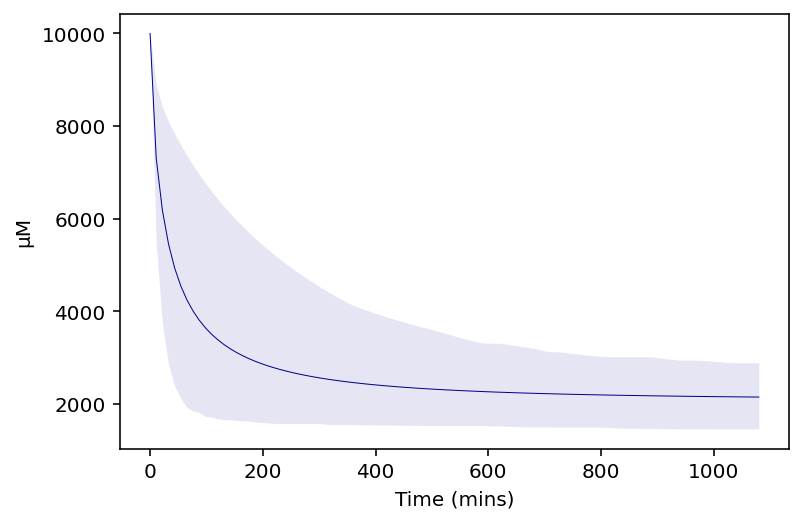

-- Aldehyde --


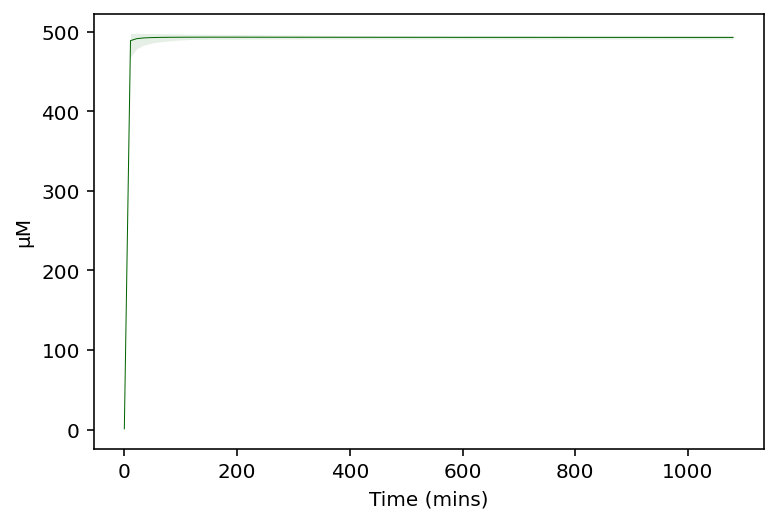

-- Amine --


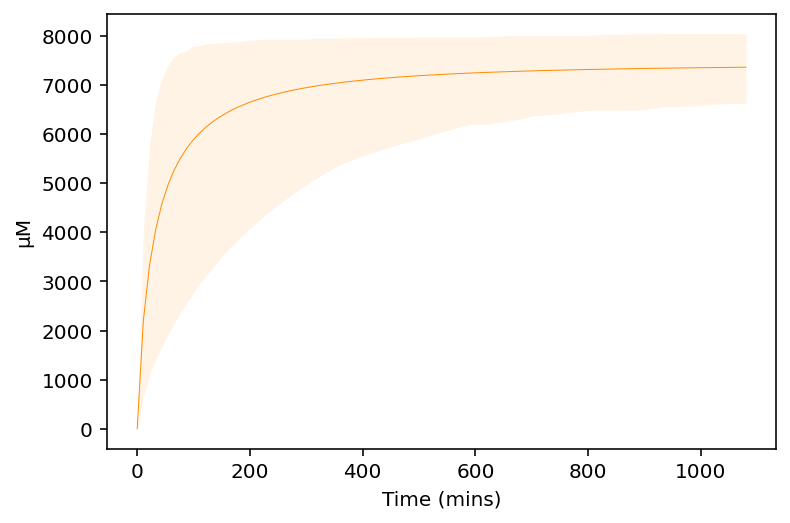

-- NADPH --


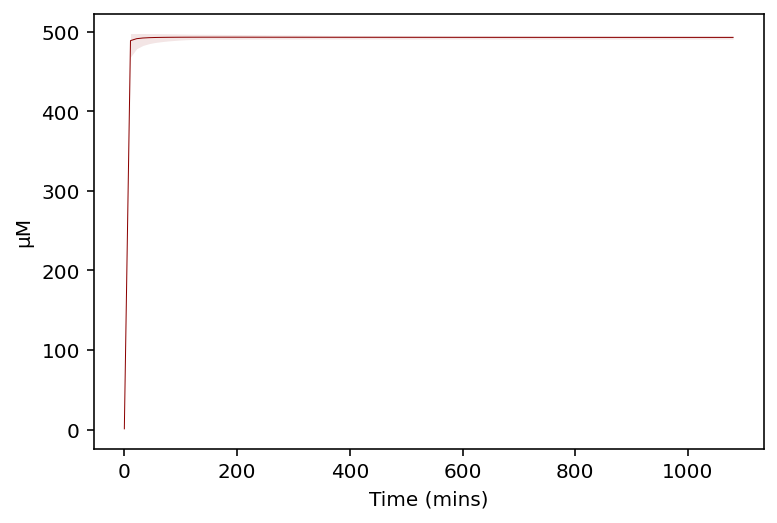

-- NADP --


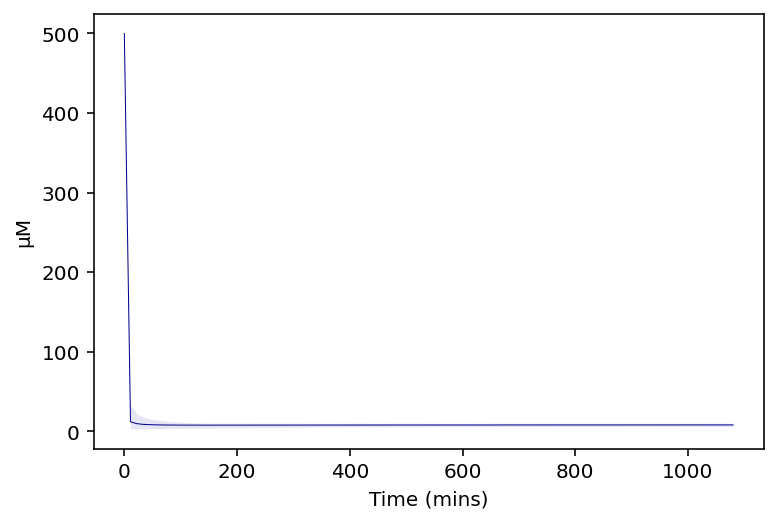

In [98]:
# Plot the confidence intervals
print("-- Alcohol --")
kinetics.plot_ci_intervals(['alcohol'], df95,
                           units=['μM', 'Time (mins)'],
                           alpha=0.1)
plt.show()


print("-- Aldehyde --")
kinetics.plot_ci_intervals(['aldehyde'], df95,
                           units=['μM', 'Time (mins)'],
                           alpha=0.1)
plt.show()

print("-- Amine --")
kinetics.plot_ci_intervals(['amine'], df95,
                           units=['μM', 'Time (mins)'],
                           alpha=0.1)
plt.show()


print("-- NADPH --")
kinetics.plot_ci_intervals(['nadph'], df95,
                           units=['μM', 'Time (mins)'],
                           alpha=0.1)
plt.show()


print("-- NADP --")
kinetics.plot_ci_intervals(['nadp'], df95,
                           units=['μM', 'Time (mins)'],
                           alpha=0.1)
plt.show()